In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize
import seaborn as sn
sn.set_style('darkgrid')

In [72]:
c14_atm_data = pd.read_excel('./data/14C_levin_data_until_2016_for_plotting.xlsx', names=['year', 'd14C'])

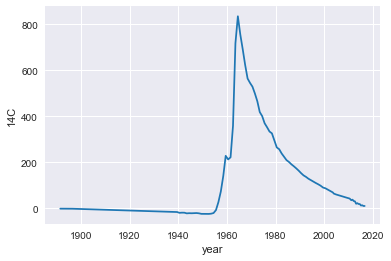

In [36]:
fig = plt.figure()
plt.plot(c14_atm_data['year'], c14_atm_data['d14C'])
plt.xlabel('year')
plt.ylabel('14C')
plt.show()

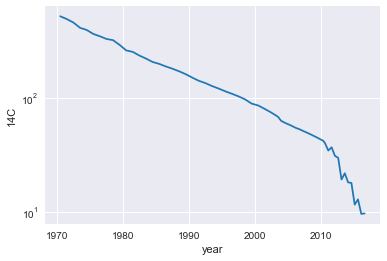

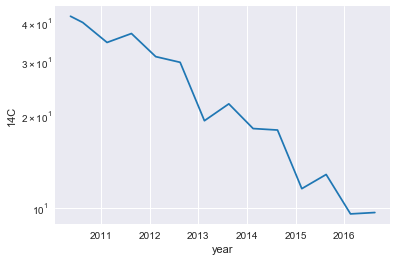

In [37]:
for t in [1970, 2010]:
    late_data = c14_atm_data.query('year > @t')
    fig = plt.figure()
    plt.plot(late_data['year'], late_data['d14C'])
    plt.xlabel('year')
    plt.ylabel('14C')
    plt.semilogy()
    plt.show()

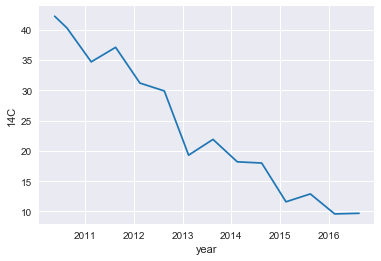

In [38]:
late_data = c14_atm_data.query('year > 2010')
fig = plt.figure()
plt.plot(late_data['year'], late_data['d14C'])
plt.xlabel('year')
plt.ylabel('14C')
#plt.semilogy()
plt.show()

In [53]:
def f1(x, m, n):
    return m*x + n

def f2(x, a, b, c):
    return a * np.exp(-b * (x-c))

def fit(f, p0=None):
    p = sp.optimize.curve_fit(f, late_data['year'], late_data['d14C'], p0)[0]
    return lambda x: f(x, *p)

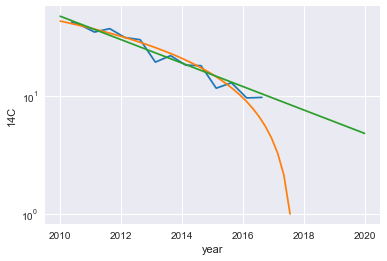

In [58]:
late_data = c14_atm_data.query('year > 2010')
fig = plt.figure()
plt.plot(late_data['year'], late_data['d14C'])
t = np.linspace(2010, 2020)
plt.plot(t, fit(f1)(t))
plt.plot(t, fit(f2, [1, 1, 2010])(t))
plt.xlabel('year')
plt.ylabel('14C')
plt.semilogy()
plt.show()

In [59]:
c14_atm_data.tail()

,year,d14C
137,2014.626,18.0
138,2015.125,11.6
139,2015.625,12.9
140,2016.125,9.6
141,2016.625,9.7


In [81]:
c14_atm_data = pd.read_excel('./data/14C_levin_data_until_2016_for_plotting.xlsx', names=['year', 'd14C'])

In [82]:
late_data = c14_atm_data.query('year > 2010')

def f2(x, a, b, c):
    return a * np.exp(-b * (x-c))

def fit(f, p0=None):
    p = sp.optimize.curve_fit(f, late_data['year'], late_data['d14C'], p0)[0]
    return lambda x: f(x, *p)

tt = np.arange(c14_atm_data['year'].max() + 0.5, 2025, 0.5)
cc = fit(f2, [1, 1, 2010])(tt)

j = c14_atm_data.index.max()
for i in np.arange(0, len(tt)-0.5, 1).astype(int):
    c14_atm_data.loc[j+i+1, 'year'] = tt[i]
    c14_atm_data.loc[j+i+1, 'd14C'] = cc[i]

In [84]:
c14_atm_data.tail()

,year,d14C
153,2022.625,2.636395
154,2023.125,2.351627
155,2023.625,2.097619
156,2024.125,1.871046
157,2024.625,1.668947


In [86]:
sn.set_context('talk')

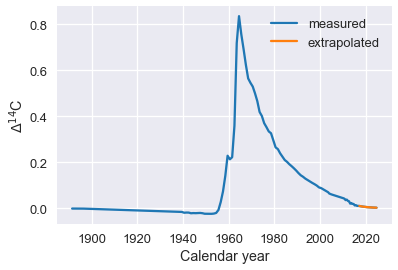

In [95]:
fig = plt.figure()
plt.plot(c14_atm_data['year'], c14_atm_data['d14C']/1000, label='measured')
plt.plot(tt, cc/1000, label='extrapolated')

plt.xlabel('Calendar year')
plt.ylabel('$\Delta^{14}$C')

plt.legend()

plt.show()